In [1]:
!pip install kaggle

In [2]:
!mkdir-/.kaggle/

/bin/bash: line 1: mkdir-/.kaggle/: No such file or directory


In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:04<00:00, 70.2MB/s]
100% 428M/428M [00:04<00:00, 96.0MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa #python package for music system
import librosa.display
from IPython.display import Audio #by this we can play music
import warnings
warnings.filterwarnings('ignore')
from keras import utils #Deep Learning Library

In [6]:
paths=[]
labels=[]

for dirname,_,filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
      paths.append(os.path.join(dirname,filename))
      label=filename.split('_')[-1]
      label=label.split('.')[0]
      labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [9]:
df = pd.DataFrame()
df["speech"]= paths
df["labels"]= labels
df.head()

,speech,labels
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,happy
2,/content/TESS Toronto emotional speech set dat...,happy
3,/content/TESS Toronto emotional speech set dat...,happy
4,/content/TESS Toronto emotional speech set dat...,happy


In [10]:
df['labels'].value_counts()

,count
labels,
happy,400
fear,400
sad,400
neutral,400
disgust,400
angry,400
ps,400


In [11]:
df['label_count'] = df['labels'].value_counts()
df.drop('label_count',axis=1)

,speech,labels
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,happy
2,/content/TESS Toronto emotional speech set dat...,happy
3,/content/TESS Toronto emotional speech set dat...,happy
4,/content/TESS Toronto emotional speech set dat...,happy
...,...,...
2795,/content/TESS Toronto emotional speech set dat...,ps
2796,/content/TESS Toronto emotional speech set dat...,ps
2797,/content/TESS Toronto emotional speech set dat...,ps
2798,/content/TESS Toronto emotional speech set dat...,ps


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   labels       2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [13]:
df.drop('label_count', axis=1, inplace = True)

In [14]:
print(df.head())
print(df['labels'].unique())

                                              speech labels
0  /content/TESS Toronto emotional speech set dat...  happy
1  /content/TESS Toronto emotional speech set dat...  happy
2  /content/TESS Toronto emotional speech set dat...  happy
3  /content/TESS Toronto emotional speech set dat...  happy
4  /content/TESS Toronto emotional speech set dat...  happy
['happy' 'fear' 'sad' 'neutral' 'disgust' 'angry' 'ps']


In [15]:
df['speech'].unique()

array(['/content/TESS Toronto emotional speech set data/OAF_happy/OAF_keep_happy.wav',
       '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_rain_happy.wav',
       '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_lean_happy.wav',
       ...,
       '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_keen_ps.wav',
       '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tire_ps.wav',
       '/content/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_half_ps.wav'],
      dtype=object)

In [16]:
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4)) # Changed 'fguresize' to 'figsize'
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()
def spectogram(data, sr, emotion):
    # use librosa to compute the spectrogram
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(14, 5))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

#stft = short time fourier transform

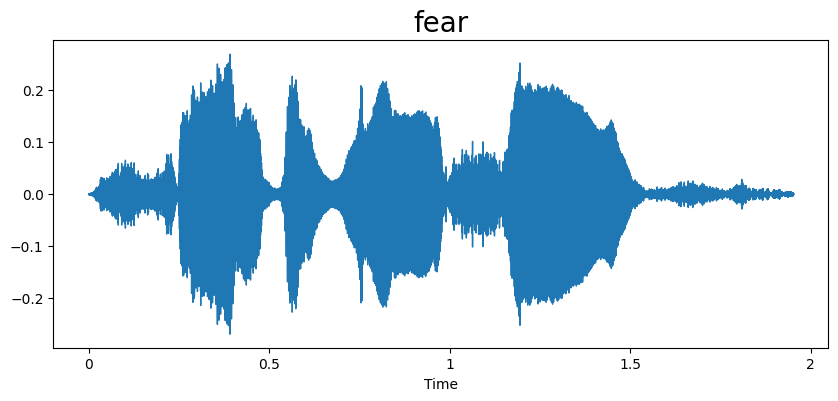

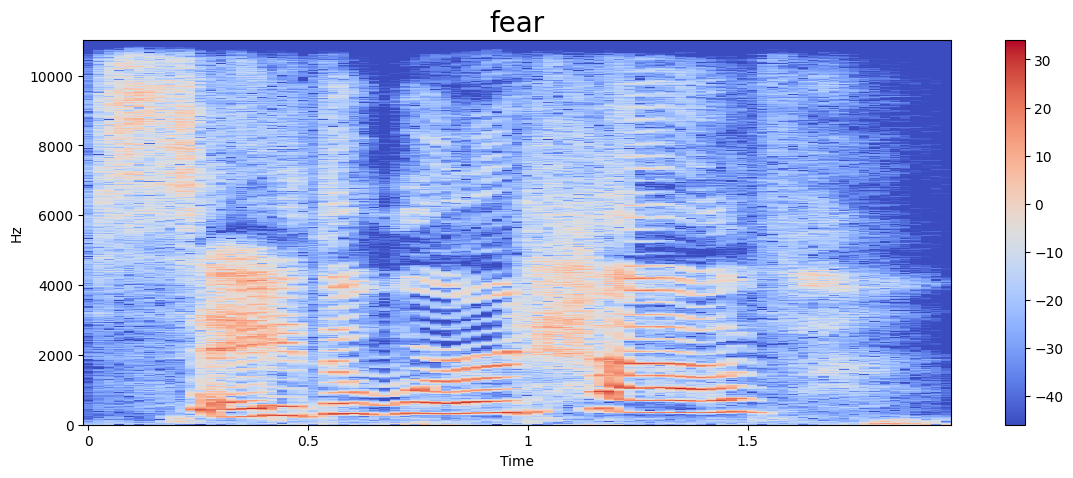

In [17]:
emotion = 'fear'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

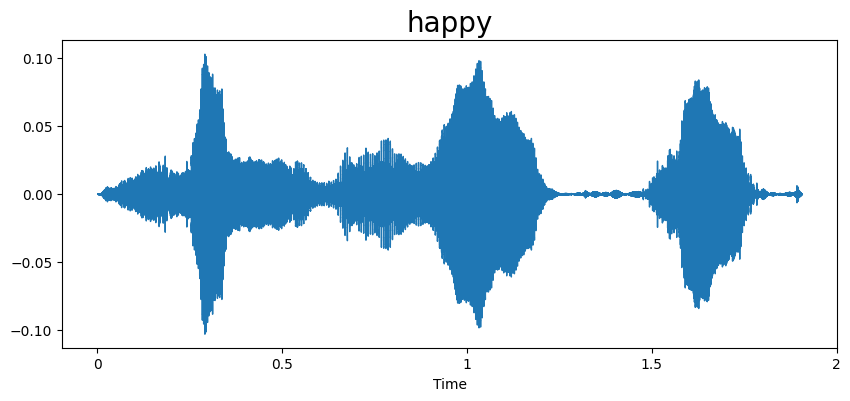

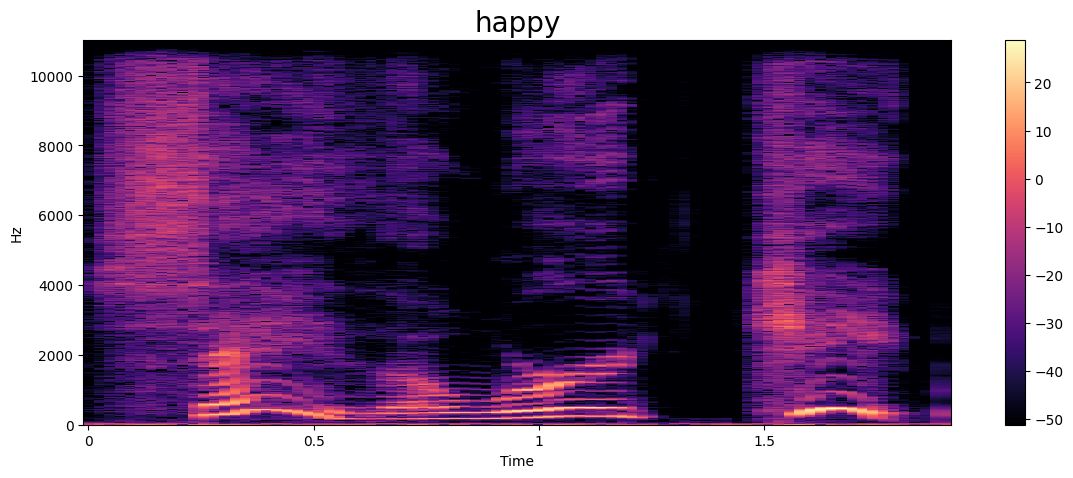

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

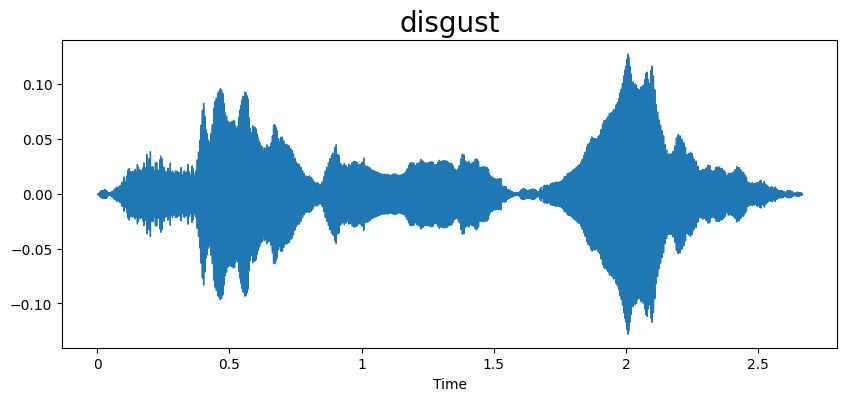

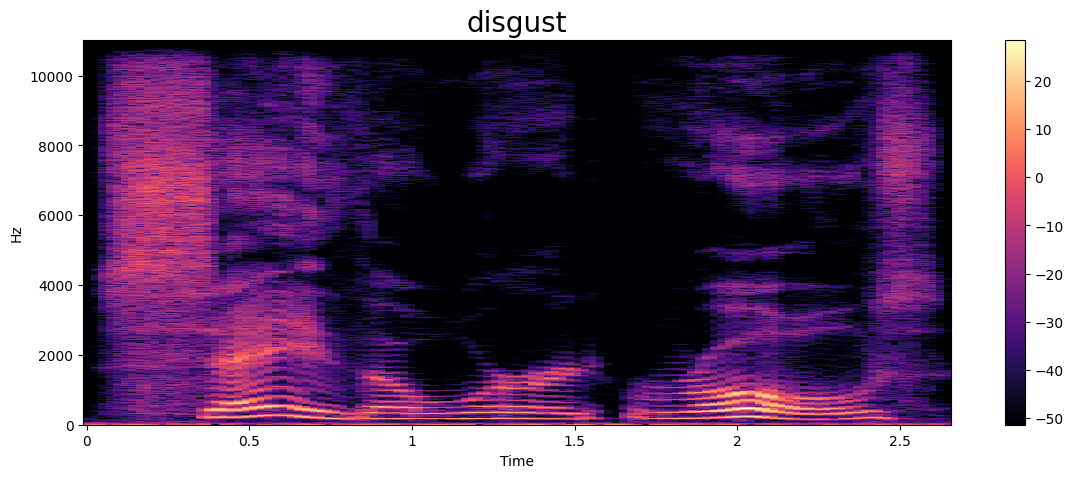

In [19]:
emotion = 'disgust'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

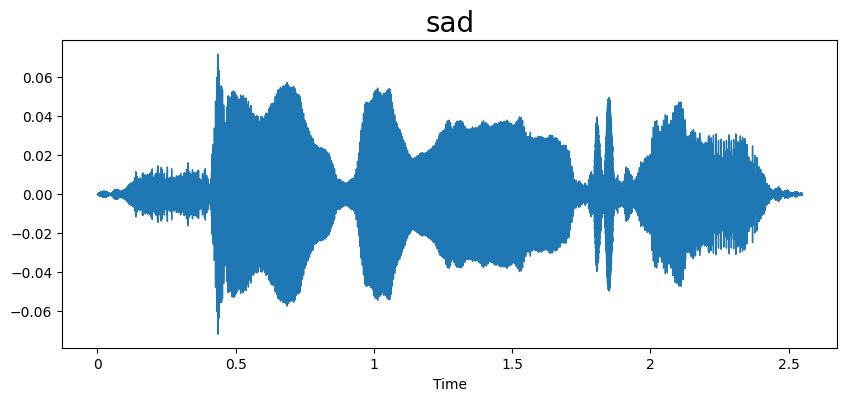

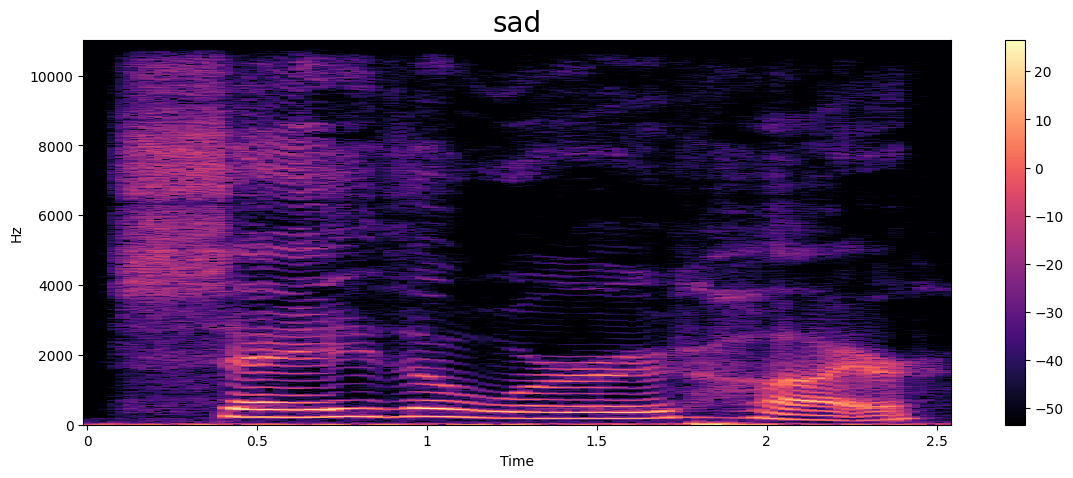

In [20]:
emotion = 'sad'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

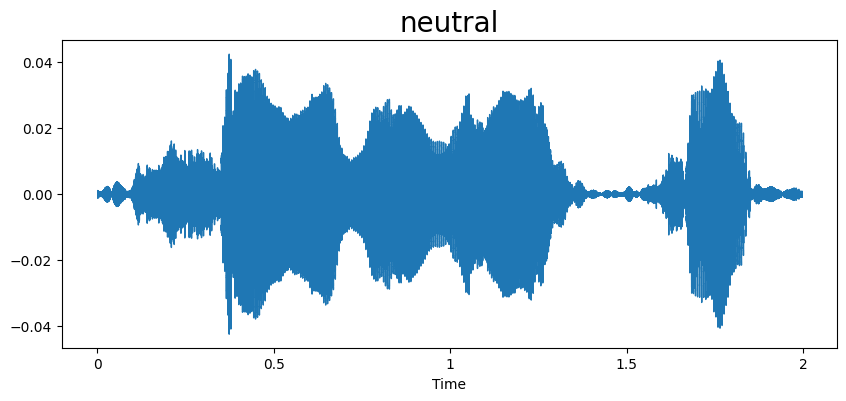

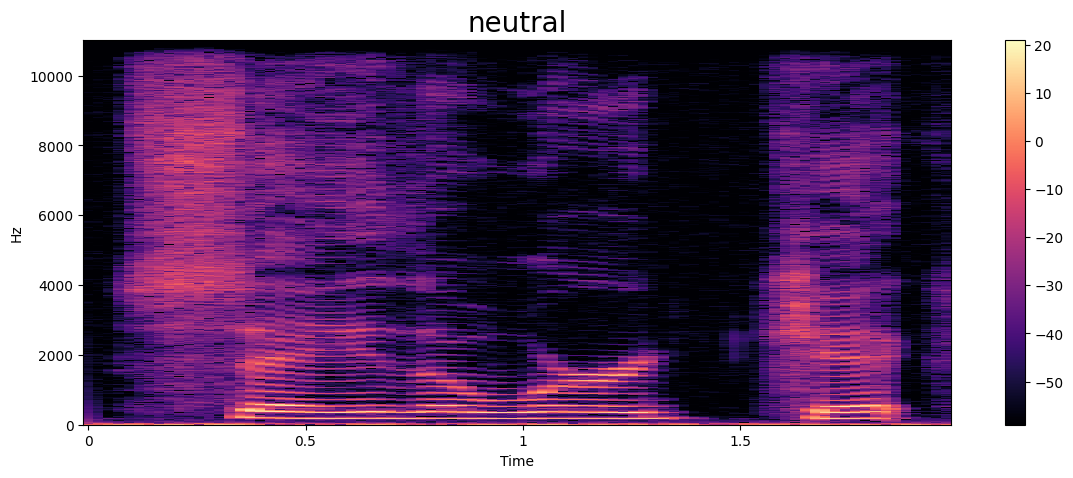

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

<Axes: xlabel='labels', ylabel='count'>

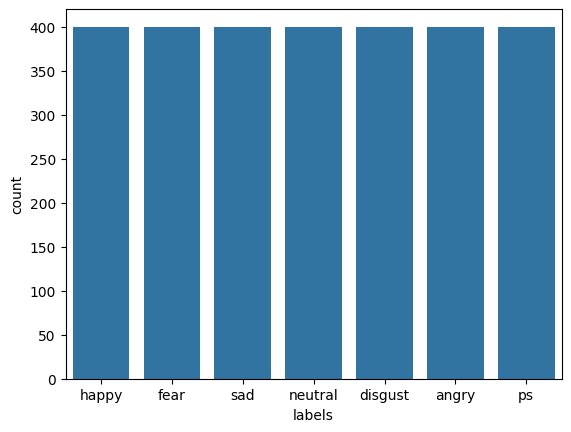

In [22]:
sns.countplot(data=df,x='labels')

In [23]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [24]:
extract_mfcc(df['speech'][0])

array([-5.0587115e+02,  8.2794395e+01,  2.8410505e+01,  4.2824273e+00,
        9.4589291e+00,  8.6772186e-01, -1.9823838e+00, -3.1623302e+00,
       -2.0514957e+01, -3.7712874e+00, -1.5934051e+01, -5.3664260e+00,
       -7.9249086e+00, -2.0551777e+00,  3.2635591e+00,  4.8722534e+00,
        1.7836412e+00,  1.1727112e+01,  2.5498676e+00, -1.2649821e+00,
        2.8612790e+00, -2.2618656e+00, -2.6995912e+00, -7.8695267e-01,
       -5.3314395e+00,  5.2888570e+00, -2.1339917e-01,  9.6756954e+00,
        3.7345433e+00,  8.8631945e+00,  4.7394557e+00,  4.1352539e+00,
        1.5811241e+00,  1.4179065e+00,  3.2663028e+00,  8.6123686e+00,
        2.6770000e+00,  2.7458315e+00,  3.9175348e+00,  1.1014188e+01],
      dtype=float32)

In [25]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [26]:
X_mfcc

,speech
0,"[-505.87115, 82.794395, 28.410505, 4.2824273, ..."
1,"[-465.01144, 119.370895, 24.835619, -14.665585..."
2,"[-460.75516, 107.275314, 31.163797, 0.49460888..."
3,"[-468.27075, 121.735466, 23.662453, -28.561356..."
4,"[-473.33392, 100.340515, 32.430946, -17.715473..."
...,...
2795,"[-358.9251, 65.29176, -12.791978, -11.641278, ..."
2796,"[-376.0958, 68.02976, -19.485264, -4.283204, -..."
2797,"[-391.81375, 49.814564, -2.685274, 25.794374, ..."
2798,"[-338.49506, 76.57535, -25.690166, -0.6396238,..."


In [27]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [28]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['labels']])

In [30]:
y-y.toarray()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y.shape

(2800, 7)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
#Create a LSTM Model

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([LSTM(256, return_sequences=False, input_shape=(40,1)),
                  Dropout(0.2),
                  Dense(128, activation='relu'),
                  Dropout(0.2),
                  Dense(64, activation='relu'),
                  Dropout(0.2),
                  Dense(7, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model:"sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Convert y_train and y_test to dense numpy arrays
y_train_dense = y_train.toarray()
y_test_dense = y_test.toarray() # Changed y_val to y_test

#Train the model using the dense arrays
history=model.fit(X_train, y_train_dense, validation_data=(X_test,y_test_dense), epochs=30, batch_size=64)

# Access training history
print(history.history)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.3675 - loss: 1.6240 - val_accuracy: 0.7298 - val_loss: 0.6969
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.6809 - loss: 0.8117 - val_accuracy: 0.8571 - val_loss: 0.3867
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.8370 - loss: 0.4590 - val_accuracy: 0.8857 - val_loss: 0.3304
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 374ms/step - accuracy: 0.9056 - loss: 0.2850 - val_accuracy: 0.9190 - val_loss: 0.2191
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.9240 - loss: 0.2383 - val_accuracy: 0.9476 - val_loss: 0.1509
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.9307 - loss: 0.2263 - val_accuracy: 0.9595 - val_loss: 0.1316
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9392 - loss: 0.1985 - val_accuracy: 0.9345 - val_loss: 0.1842
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9504 - loss: 0.1607 - val_accurac

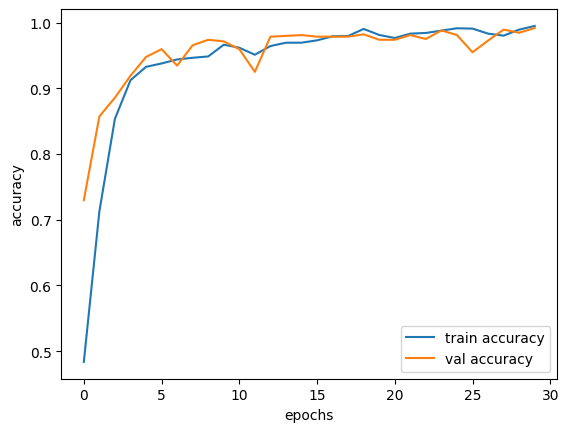

In [36]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

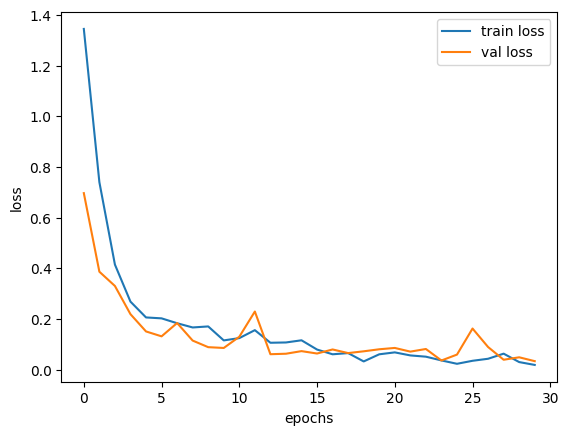

In [37]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_test, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# Convert y_val_classes and y_pred_classes to NumPy arrays if they are matrices
if isinstance(y_val_classes, np.matrix):
    y_val_classes = np.asarray(y_val_classes)
if isinstance(y_pred_classes, np.matrix):
    y_pred_classes = np.asarray(y_pred_classes)

# Compute confusion matrix
confusion_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[121   1   0   0   0   1   0]
 [  1 135   0   0   0   0   0]
 [  0   0 113   2   0   0   0]
 [  0   0   0 110   0   1   0]
 [  0   0   0   0 112   0   0]
 [  0   0   0   1   0 115   0]
 [  0   0   0   0   0   0 127]]


In [41]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       0.99      0.98      0.99       123
     disgust       0.99      0.99      0.99       136
        fear       1.00      0.98      0.99       115
       happy       0.97      0.99      0.98       111
     neutral       1.00      1.00      1.00       112
          ps       0.98      0.99      0.99       116
         sad       1.00      1.00      1.00       127

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



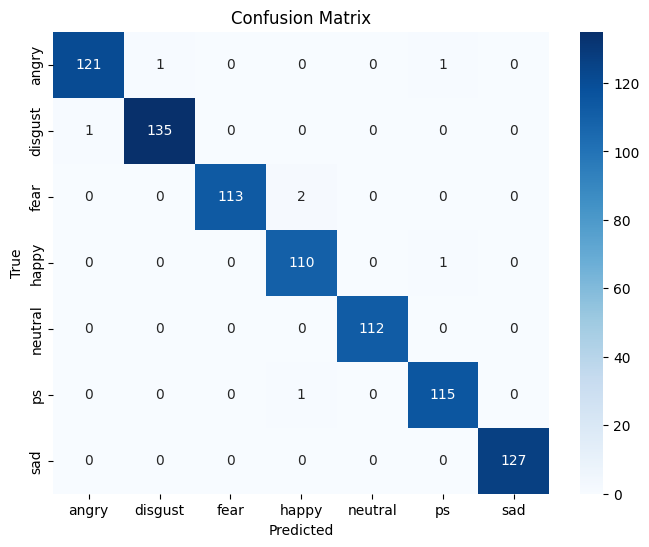

In [42]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
model=pickle.dump(model,open('/content/drive/MyDrive/Speech_Emotion_Recognition.pkl','wb'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
